# Data 03
July 13, 2022.   
Work with the existing train/valid split though one WSI is missing.
Here, try filtering by RBC.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUM_CLASSES = 6
BASE_PATH = '/home/jrm/Adjeroh/Naved/CP_80K/'
# The "Merge RBC" data gives a rough RBC count after cell bounaries were de-spiked and merged.
RBC_FILE = 'Process100_RBC.csv'
MRBC_FILE = 'Process100_MergeRBC.csv'
PATCH_FILE = 'Process100_Image.csv'
def load_rbc(cancer_class):
    CLASS_DIR = 'Output'+str(CL)
    fp = BASE_PATH+CLASS_DIR+'/'+RBC_FILE
    rbc_df = pd.read_csv(fp)
    return rbc_df 
def load_mrbc(cancer_class):
    CLASS_DIR = 'Output'+str(CL)
    fp = BASE_PATH+CLASS_DIR+'/'+MRBC_FILE
    rbc_df = pd.read_csv(fp)
    return rbc_df 
def load_patches(cancer_class):
    CLASS_DIR = 'Output'+str(CL)
    fp = BASE_PATH+CLASS_DIR+'/'+PATCH_FILE
    patch_df = pd.read_csv(fp)
    return patch_df 

Run for-loops on the RBC and MergedRBC object.csv files (which are large).

In [3]:
print('Class patches RBC RBC/patch MergedArea/patch')
for CL in range(NUM_CLASSES):
    patch_df = load_patches(CL)
    num_patches = len(patch_df)
    num_RBC = sum(patch_df['Count_RBC'])
    tot_area = sum(patch_df['AreaOccupied_AreaOccupied_MergeRBC'])
    print('%d   %d    %d     %.2f    %.2f'%(CL,num_patches,num_RBC,(num_RBC/num_patches),(tot_area/num_patches)))

Class patches RBC RBC/patch MergedArea/patch
0   44966    127127     2.83    1672.40
1   12902    27085     2.10    1325.25
2   13950    64078     4.59    2976.20
3   6364    20517     3.22    2028.12
4   3197    12896     4.03    2701.64
5   1591    2914     1.83    1065.74


For setting thresholds on tissue (i.e. not background), find the elbows in the curves.

Class 0 Tissue - Pixels per Patch


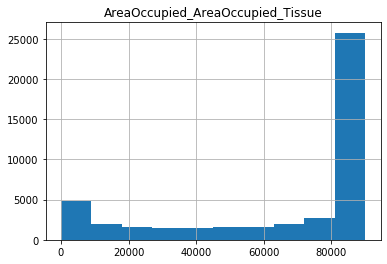

Class 1 Tissue - Pixels per Patch


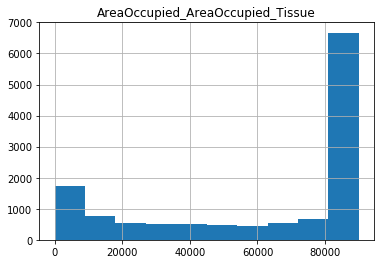

Class 2 Tissue - Pixels per Patch


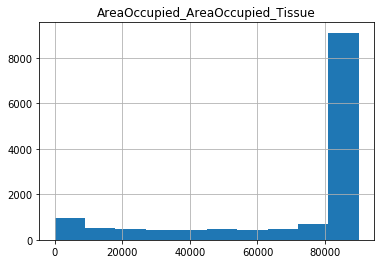

Class 3 Tissue - Pixels per Patch


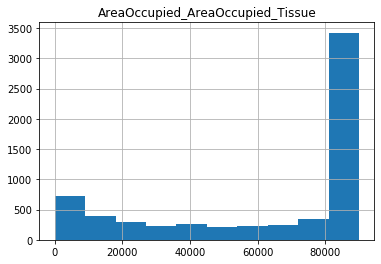

Class 4 Tissue - Pixels per Patch


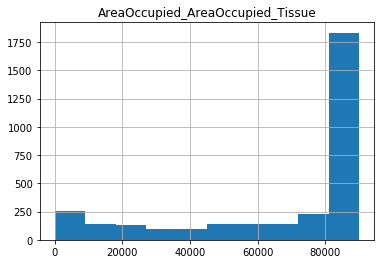

Class 5 Tissue - Pixels per Patch


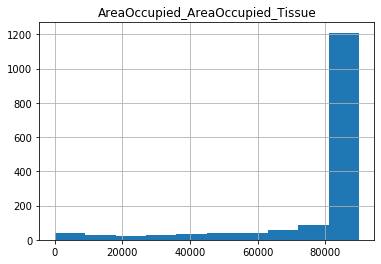

In [4]:
for CL in range(NUM_CLASSES):
    print('Class',CL,'Tissue - Pixels per Patch')
    patch_df = load_patches(CL)
    pd.DataFrame.hist(patch_df,column='AreaOccupied_AreaOccupied_Tissue')
    plt.show()

For setting thresholds on too-much-RBC, find the elbows in the curves.

Class 0 Merged RBC - Pixels per Patch


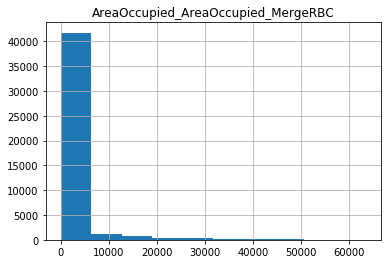

Class 1 Merged RBC - Pixels per Patch


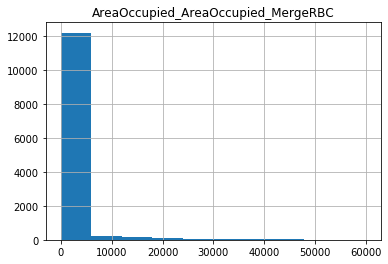

Class 2 Merged RBC - Pixels per Patch


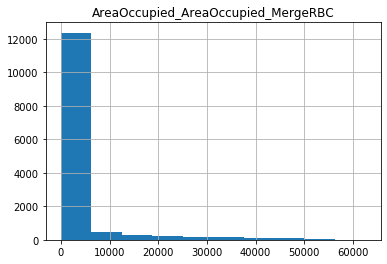

Class 3 Merged RBC - Pixels per Patch


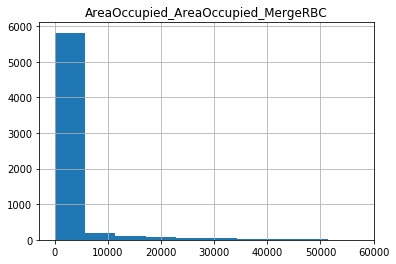

Class 4 Merged RBC - Pixels per Patch


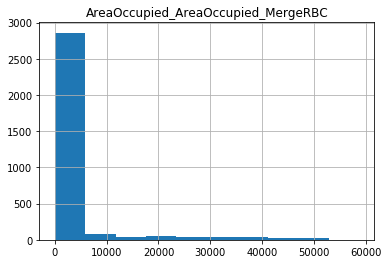

Class 5 Merged RBC - Pixels per Patch


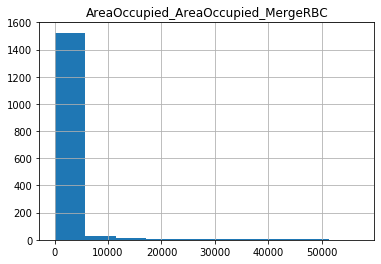

In [5]:
for CL in range(NUM_CLASSES):
    print('Class',CL,'Merged RBC - Pixels per Patch')
    patch_df = load_patches(CL)
    pd.DataFrame.hist(patch_df,column='AreaOccupied_AreaOccupied_MergeRBC')
    plt.show()

In [6]:
col = 'AreaOccupied_AreaOccupied_MergeRBC'
for CL in range(NUM_CLASSES):
    print('Class','>0','>1K','>2K','>3K','>4K','>5K','>6K')
    patch_df = load_patches(CL)
    a = len(patch_df[patch_df[col]>0])
    b = len(patch_df[patch_df[col]>1000])
    c = len(patch_df[patch_df[col]>2000])
    d = len(patch_df[patch_df[col]>3000])
    e = len(patch_df[patch_df[col]>4000])
    f = len(patch_df[patch_df[col]>5000])
    g = len(patch_df[patch_df[col]>6000])
    print(CL,':',a,b,c,d,e,f,g)

Class >0 >1K >2K >3K >4K >5K >6K
0 : 10668 6979 5555 4704 4148 3677 3299
Class >0 >1K >2K >3K >4K >5K >6K
1 : 2857 1659 1268 1058 882 778 698
Class >0 >1K >2K >3K >4K >5K >6K
2 : 4081 2776 2294 2044 1867 1741 1621
Class >0 >1K >2K >3K >4K >5K >6K
3 : 2255 1321 995 794 687 589 527
Class >0 >1K >2K >3K >4K >5K >6K
4 : 611 451 404 378 361 347 333
Class >0 >1K >2K >3K >4K >5K >6K
5 : 392 190 131 102 91 73 64


Show that the same information is represented in just the Image.csv file (which is smaller).

In [7]:
print('Class patches RBC RBC/patch MergedArea/patch')
for CL in range(NUM_CLASSES):
    rbc_df = load_rbc(CL)
    num_RBC = len(rbc_df)
    patch_df = load_patches(CL)
    num_patches = len(patch_df)
    mrbc_df = load_mrbc(CL)
    tot_area = sum(mrbc_df['AreaShape_Area'])
    print('%d   %d    %d     %.2f    %.2f'%(CL,num_patches,num_RBC,(num_RBC/num_patches),(tot_area/num_patches)))

Class patches RBC RBC/patch MergedArea/patch
0   44966    127127     2.83    1672.40
1   12902    27085     2.10    1325.25
2   13950    64078     4.59    2976.20
3   6364    20517     3.22    2028.12
4   3197    12896     4.03    2701.64
5   1591    2914     1.83    1065.74
